EARTHQUAKE DATASET CLASSIFICATION MODEL STACKING.

PREDICTION: Level of damage to buildings (Ordered categorical variable).

TO FIND: Relationship between other variables and 'damage grade':
- Numeric building parameters. (Linear regression)
- Unordered categorical building parameters. (Clustering)
- Binary construction material parameters. (Correlation)

PROBLEM STATEMENT:
- Determining the extent of damage to a building during an earthquake has the impact of identifying which buildings are less likely to collapse when an earthquake strikes, which would  reduce the number of people at risk of death or injury.

In [1]:
# Import Basic Libraries.
import numpy as np
import pandas as pd

# Import libraries for graph plotting. Only pyplot is needed. Use Seaborn style for graphics.
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

# Import the library for the two way confusion matrix.
from sklearn.metrics import confusion_matrix

# Import the library to split the data into training and test sets.
from sklearn.model_selection import train_test_split

# Import scikit learn metrics module for accuracy calculation.
from sklearn.metrics import accuracy_score

# Import the random forest classifier.
from sklearn.ensemble import RandomForestClassifier

# Import the kneighbours classifier.
from sklearn.neighbors import KNeighborsClassifier

# Import the xgboost classifier.
from xgboost import XGBClassifier

# Import the stacking algorithm.
from vecstack import stacking

# Import the metrics for determining mean square error.
from sklearn.metrics import mean_squared_error

In [2]:
# Read dataset from file.
earthquake_data = pd.read_csv('Dataset 2 - Earthquake Training Values.csv')
# Display the data.
earthquake_data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


In [3]:
# Determine dataframe type and shape.
print("Data type : ", type(earthquake_data))
# Display dataframe dimensions (rows and columns).
print("Data dimensions : ", earthquake_data.shape)
# Determine the data types of the variables in the dataset.
earthquake_data.info()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dimensions :  (260601, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                  

In [4]:
# Get a brief summary of the statistics of the values in the dataframe.
earthquake_data.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# Extract the variables of interest into another dataframe.
earthquake_focus = pd.DataFrame(earthquake_data[['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
    'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage', 'land_surface_condition', 'foundation_type',
    'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud',
    'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone',
    'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
    'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered',
    'has_superstructure_other', 'damage_grade']])
earthquake_focus

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,damage_grade
0,6,487,12198,2,30,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
1,8,900,2812,2,10,8,7,o,r,n,...,0,0,0,0,0,0,0,0,0,2
2,21,363,8973,2,10,5,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
3,22,418,10694,2,10,6,5,t,r,n,...,0,0,0,0,1,1,0,0,0,2
4,11,131,1488,3,30,8,9,t,r,n,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,n,r,n,...,0,0,0,0,0,0,0,0,0,2
260597,17,715,2060,2,0,6,5,t,r,n,...,0,0,0,0,0,0,0,0,0,3
260598,17,51,8163,3,55,6,7,t,r,q,...,0,0,0,0,0,0,0,0,0,3
260599,26,39,1851,2,10,14,6,t,r,x,...,0,0,0,1,0,0,0,0,0,2


In [6]:
# Determine the data types of the extracted variables.
earthquake_focus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 26 columns):
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non-null object
plan_configuration                        260601 no

In [7]:
# Perform one hot encoding of categorical variables, using dummy variables.
earthquake_onehot = pd.get_dummies(earthquake_focus)
earthquake_onehot

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0
260597,17,715,2060,2,0,6,5,0,1,0,...,0,0,1,0,0,0,0,0,0,0
260598,17,51,8163,3,55,6,7,0,1,0,...,0,0,1,0,0,0,0,0,0,0
260599,26,39,1851,2,10,14,6,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [8]:
# Determine the data types of the one hot encoded categorical variables.
# Notice that the sub headers for each category are displayed as a numeric value now.
earthquake_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 53 columns):
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
has_superstructure_adobe_mud              260601 non-null int64
has_superstructure_mud_mortar_stone       260601 non-null int64
has_superstructure_stone_flag             260601 non-null int64
has_superstructure_cement_mortar_stone    260601 non-null int64
has_superstructure_mud_mortar_brick       260601 non-null int64
has_superstructure_cement_mortar_brick    260601 non-null int64
has_superstructure_timber                 260601 non-null

In [9]:
# Identify the labels, which are the values to be predicted.
# Place all the values of damage grade into a numpy array.
damage_predict_label = np.array(earthquake_onehot['damage_grade'])
damage_predict_label

array([3, 2, 3, ..., 3, 2, 3], dtype=int64)

In [10]:
# Remove the 'damage_grade' column from the 'earthquake_onehot' dataframe.
# 'axis = 1' refers to the columns.
earthquake_onehot = earthquake_onehot.drop('damage_grade', axis = 1)
earthquake_onehot

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_a,plan_configuration_c,plan_configuration_d,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u
0,6,487,12198,2,30,6,5,1,1,0,...,0,0,1,0,0,0,0,0,0,0
1,8,900,2812,2,10,8,7,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,21,363,8973,2,10,5,5,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,22,418,10694,2,10,6,5,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,11,131,1488,3,30,8,9,1,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,25,1335,1621,1,55,6,3,0,1,0,...,0,0,0,0,0,0,0,1,0,0
260597,17,715,2060,2,0,6,5,0,1,0,...,0,0,1,0,0,0,0,0,0,0
260598,17,51,8163,3,55,6,7,0,1,0,...,0,0,1,0,0,0,0,0,0,0
260599,26,39,1851,2,10,14,6,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [11]:
# Convert the current dataframe into a numpy array. It becomes an array of arrays.
earthquake_onehot = np.array(earthquake_onehot)
earthquake_onehot

array([[    6,   487, 12198, ...,     0,     0,     0],
       [    8,   900,  2812, ...,     0,     0,     0],
       [   21,   363,  8973, ...,     0,     0,     0],
       ...,
       [   17,    51,  8163, ...,     0,     0,     0],
       [   26,    39,  1851, ...,     0,     0,     0],
       [   21,     9,  9101, ...,     0,     0,     0]], dtype=int64)

In [12]:
# Split the data into training and test sets.
# Note: The random state acts as a starting seed for the random number generator.
# Assigning it any fixed numeric value will ensure that the training and test sets are the same everytime.
# Not specifying this variable will lead to a different training and test set outcome everytime.
train_earthquake, test_earthquake, earthquake_train_labels, earthquake_test_labels = train_test_split(
earthquake_onehot, damage_predict_label, test_size = 0.25, random_state = 0)

In [13]:
# Examine the shape of the data to ensure that the training and test sets are split correctly.
# The predictor labels are only one dimensional and hence have no number after the comma.
print("Earthquake Training Set Shape: ", train_earthquake.shape)
print("Earthquake Training Damage Grade Predictor Shape: ", earthquake_train_labels.shape)
print("Earthquake Testing Set Shape: ", test_earthquake.shape)
print("Earthquake Testing Damage Grade Predictor Shape: ", earthquake_test_labels.shape)

Earthquake Training Set Shape:  (195450, 52)
Earthquake Training Damage Grade Predictor Shape:  (195450,)
Earthquake Testing Set Shape:  (65151, 52)
Earthquake Testing Damage Grade Predictor Shape:  (65151,)


CREATE THE MODEL STACK USING:

- K Nearest Neighbor.
- Random Forest Classifier.
- Extreme Gradient Boosting.

In [14]:
# Create a list of the stacked models and their parameters.
# Parameter descriptions for eah model can be found on scikit learn.
stacked_models = [
    KNeighborsClassifier(n_neighbors = 5, n_jobs = -1),
    RandomForestClassifier(random_state = 0, n_jobs = -1,
                          n_estimators = 200),
    XGBClassifier(random_state = 0, n_jobs = -1, learning_rate = 0.5,
                 n_estimators = 200) ]

ARUGUMENTS OF THE STACKING FUNCTION:

- regression: Whether to use the function for regression. (Set as false for classification.)
- mode: Using cross validation to predict the put of fold part of the train set.
- needs_proba: Boolean indicating if you need the probabilities of class labels.
- save_dir: Whether to save the result to a directory. (Set flase as it is not required here.)
- metric: The evaluation metric to use. (Here imported as 'accuracy_score'.)
- n_folds: The number of folds to use for cross validation.
- stratified: Whether to use straitified cross validation.
- shuffle: Whether to shuffle the data.
- random_state: Set a random seed starting value for the reproducibility.
- verbose: Determine how much model information to show. (2 here means all information.)

In [15]:
# This part takes very long to run, depending on the number of folds.
Stacked_train, Stacked_test = stacking(stacked_models,
                              train_earthquake, earthquake_train_labels, test_earthquake, regression = False,
                              mode = 'oof_pred_bag', needs_proba = False, save_dir = None, metric = accuracy_score,
                              n_folds = 4, stratified = True, shuffle = True, random_state = 0, verbose = 2)
# The output of each fold shows the accuracy for that fold.

task:         [classification]
n_classes:    [3]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.70072037]
    fold  1:  [0.69870863]
    fold  2:  [0.70081045]
    fold  3:  [0.70037453]
    ----
    MEAN:     [0.70015349] + [0.00084991]
    FULL:     [0.70015349]

model  1:     [RandomForestClassifier]
    fold  0:  [0.70952030]
    fold  1:  [0.70810225]
    fold  2:  [0.70887397]
    fold  3:  [0.70723072]
    ----
    MEAN:     [0.70843181] + [0.00085609]
    FULL:     [0.70843182]

model  2:     [XGBClassifier]
    fold  0:  [0.73964473]
    fold  1:  [0.73667192]
    fold  2:  [0.73838566]
    fold  3:  [0.73793005]
    ----
    MEAN:     [0.73815809] + [0.00106332]
    FULL:     [0.73815810]



In [16]:
# View the stacked model train dataset.
print("Stacked models training set shape: ", Stacked_train.shape)
Stacked_train

Stacked models training set shape:  (195450, 3)


array([[2, 2, 2],
       [2, 1, 2],
       [3, 2, 2],
       ...,
       [2, 1, 1],
       [3, 3, 3],
       [2, 2, 3]])

In [17]:
# View the stacked model test dataset.
print("Stacked models test set shape: ", Stacked_test.shape)
Stacked_test

Stacked models test set shape:  (65151, 3)


array([[2, 2, 2],
       [2, 2, 3],
       [2, 2, 2],
       ...,
       [1, 2, 2],
       [2, 2, 2],
       [1, 2, 2]])

FIT A SECOND LEVEL MODEL TO MAKE THE FINAL PREDICTION.

In [18]:
# The secondary model uses the train set output from the stacked models and fits it to the original training labels.
second_model = XGBClassifier(random_state = 0, n_jobs = -1, learning_rate = 0.5, n_estimators = 200)
second_model.fit(Stacked_train, earthquake_train_labels)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.5, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=-1, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [19]:
# Predict the damage grade using the stacked model test set output.
damage_predict = second_model.predict(Stacked_test)
damage_predict

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [20]:
# Determine the root mean square error of the test set. A lower value is better.
test_rmse = np.sqrt(mean_squared_error(earthquake_test_labels, damage_predict))
print("RMSE of test set: %f" % (test_rmse))

RMSE of test set: 0.519515


In [21]:
# Check the classification accuracy on the test set.
print("Final prediction score: ", accuracy_score(earthquake_test_labels, damage_predict))

Final prediction score:  0.7389909594634004


VISUALIZE THE PREDICTED TEST SET DAMAGE GRADES AGAINST THE ACTUAL DAMAGE GRADES.

65151
65151
test1:  6246 , test2:  36968 , test3:  21937
pred1:  5052 , pred2:  44716 , pred3:  15383
6246
36968
21937
5052
44716
15383


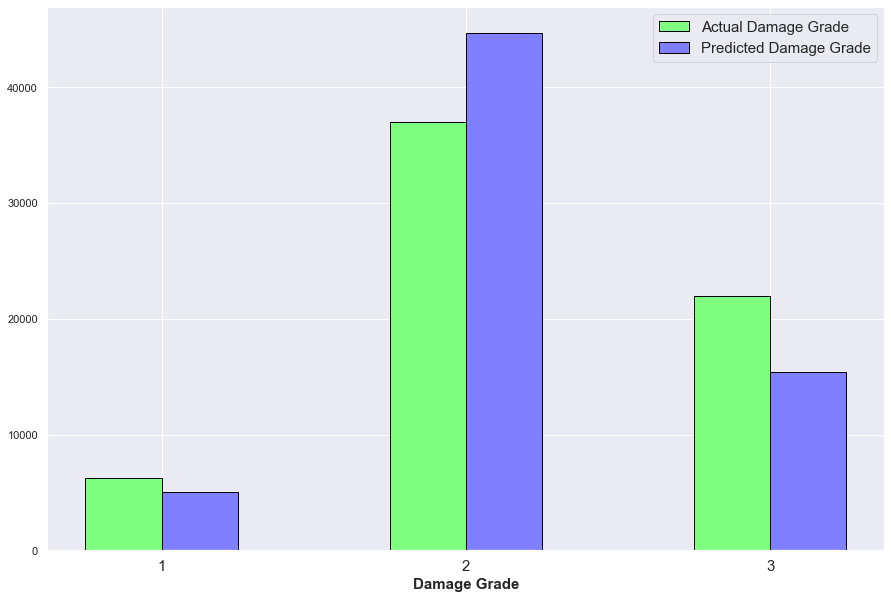

In [22]:
# Get a visualization on the prediction accuracy for each damage grade.
# Compare a countplot of the original test labels with the predicted test labels.
# The data for both prediction and actual values to be copared must be in an array form.

i, test1, test2, test3, pred1, pred2, pred3 = 0, 0, 0, 0, 0, 0, 0

print(len(earthquake_test_labels))
print(len(damage_predict))

while i < len(earthquake_test_labels):
    
    if(earthquake_test_labels[i] == 1):
        test1 += 1
    elif(earthquake_test_labels[i] == 2):
        test2 += 1
    elif(earthquake_test_labels[i] == 3):
        test3 += 1
        
    if(damage_predict[i] == 1):
        pred1 += 1
    elif(damage_predict[i] == 2):
        pred2 += 1
    elif(damage_predict[i] == 3):
        pred3 += 1
        
    i += 1
    
print("test1: ", test1, ", test2: ", test2, ", test3: ", test3)
print("pred1: ", pred1, ", pred2: ", pred2, ", pred3: ", pred3)

accuracy_list = [test1, test2, test3, pred1, pred2, pred3]

for j in accuracy_list:
    print(j)
    
# Using a paired column plot to show the relationship between the land surface condition and the damage grade.
# Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [accuracy_list[0], accuracy_list[1], accuracy_list[2]]
bars2 = [accuracy_list[3], accuracy_list[4], accuracy_list[5]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#7FFF7F', width = barWidth, edgecolor = 'black', label = 'Actual Damage Grade')
plt.bar(r2, bars2, color = '#7F7FFF', width = barWidth, edgecolor = 'black', label = 'Predicted Damage Grade')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r + 0.125 for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Results show that the predicted damage grades is relatively close to the actual damage grades.
# This is soley for the test set of 25% of the original dataset. However, accuracy can still be improved.

             Actual  Predicted
Actual     1.000000   0.608324
Predicted  0.608324   1.000000


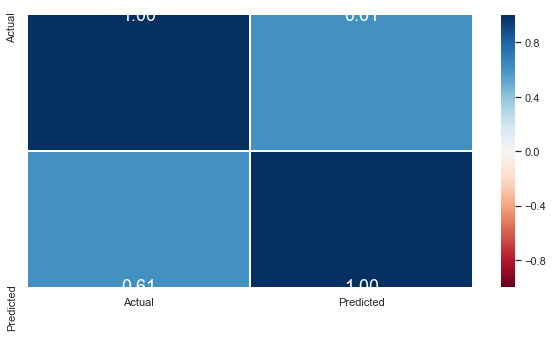

In [23]:
# Create a new dataframe that holds the actual damage values and predicted values.
damage_compare = pd.DataFrame({'Actual': earthquake_test_labels,
                               'Predicted': damage_predict}, columns=['Actual', 'Predicted'])
print(damage_compare.corr())

f, axes = plt.subplots(1, 1, figsize = (10, 5))
sb.heatmap(damage_compare.corr(), vmin = -1, vmax = 1, linewidths = 1,
annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [24]:
# Evaluate the classifier using a simple confusion matrix.
pd.crosstab(earthquake_test_labels, damage_predict, rownames = ['Actual'], colnames = ['Predicted'])

Predicted,1,2,3
Actual,,,
1,3390,2790,66
2,1535,32436,2997
3,127,9490,12320


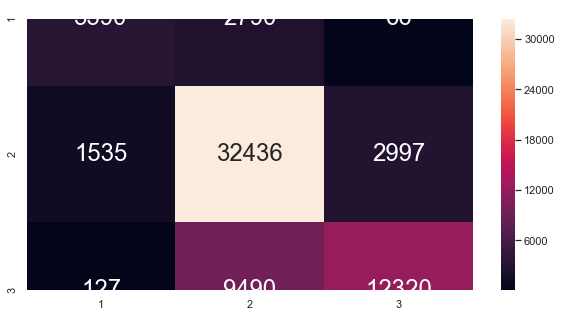

In [25]:
# Create a graphical heatmap to view the decision tree class prediction accuracy in greater detail.

f, axes = plt.subplots(1, 1, figsize = (10, 5))
sb.heatmap(confusion_matrix(damage_compare['Actual'], damage_compare['Predicted']), 
            annot = True, fmt = ".0f", annot_kws = {"size": 24}, xticklabels = '123', yticklabels = '123')

# Horizontal axis represents predicted grade and vertical axis represents actual grade.